<a href="https://colab.research.google.com/github/CodeJamjamzz/Heart_Disease_NN/blob/main/Heat_Disease_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('heart_failure_dataset.csv')

print("--Heart Failure Dataset--")
print(f"Patients: {df.shape[0]} Features: {df.shape[1]}")
display(df.head(5))

--Heart Failure Dataset--
Patients: 918 Features: 12


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
print(f"Duplicate Rows: {df.duplicated().sum()}")
print(f"Missing Values: \n{df.isnull().sum()}")

Duplicate Rows: 0
Missing Values: 
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
model = Sequential()

model.add(Dense(64, input_shape=(x_train.shape[1],), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
history_good = model.fit(
    x_train, y_train,
    epochs=25,
    validation_data=(x_test, y_test),
    verbose=1
)

model.summary()

final_val_acc = history_good.history['val_accuracy'][-1]
print(f"Training Complete! Final Validation Accuracy: {final_val_acc * 100:.2f}%")

Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5841 - loss: 0.6842 - val_accuracy: 0.8043 - val_loss: 0.6111
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8606 - loss: 0.5486 - val_accuracy: 0.8424 - val_loss: 0.4805
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8289 - loss: 0.4328 - val_accuracy: 0.8424 - val_loss: 0.4033
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8608 - loss: 0.3564 - val_accuracy: 0.8641 - val_loss: 0.3756
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8482 - loss: 0.3645 - val_accuracy: 0.8587 - val_loss: 0.3717
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8666 - loss: 0.3378 - val_accuracy: 0.8641 - val_loss: 0.3631
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8801 - loss: 0.3143 - val_accuracy: 0.8587 - val_loss: 0.3658
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8801 - loss: 0.3003 - val_accuracy: 0.8696 - val_loss

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_128 (Dense)               │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,365 (36.59 KB)

 Trainable params: 3,121 (12.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,244 (24.39 KB)

Training Complete! Final Validation Accuracy: 90.22%


--- STEP 5: VISUALIZATION ---
Generating Accuracy and Loss plots...


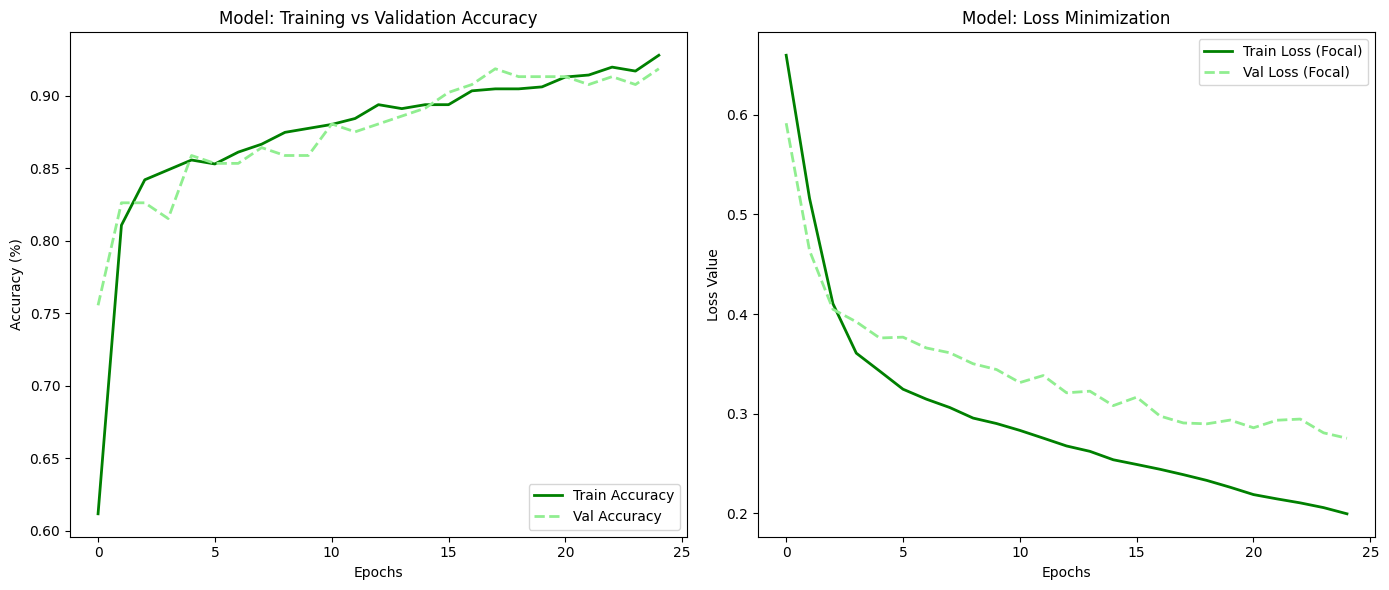

In [ ]:
def plot_good_results(history_good):
    print("--- STEP 5: VISUALIZATION ---")
    print("Generating Accuracy and Loss plots...")

    acc_good = history_good.history['accuracy']
    val_acc_good = history_good.history['val_accuracy']
    loss_good = history_good.history['loss']
    val_loss_good = history_good.history['val_loss']

    epochs_range_good = range(len(acc_good))

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range_good, acc_good, label='Train Accuracy', color='green', linewidth=2)
    plt.plot(epochs_range_good, val_acc_good, label='Val Accuracy', color='lightgreen', linewidth=2, linestyle='--')
    plt.legend(loc='lower right')
    plt.title('Model: Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range_good, loss_good, label='Train Loss (Focal)', color='green', linewidth=2)
    plt.plot(epochs_range_good, val_loss_good, label='Val Loss (Focal)', color='lightgreen', linewidth=2, linestyle='--')
    plt.legend(loc='upper right')
    plt.title('Model: Loss Minimization')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Value')

    plt.tight_layout()
    plt.show()

plot_good_results(history_good)